In [3]:
import flask
import requests


In [6]:
from google.colab import auth

auth.authenticate_user()

In [5]:
!pip install google-cloud-storage

In [8]:
from google.cloud import storage

# Replace with your Google Cloud Project ID
project_id = '542308821679'
client = storage.Client(project=project_id)
print(f"Listing buckets in project: {project_id}")

# List all buckets in your project
try:
    buckets = list(client.list_buckets())
    if buckets:
        for bucket in buckets:
            print(f"- {bucket.name}")
    else:
        print("No buckets found in this project.")
except Exception as e:
    print(f"Error listing buckets: {e}")
    print("Please ensure your project ID is correct and the authenticated user has permissions to list buckets.")

Listing buckets in project: 542308821679
- instance-dog-279783831978


In [9]:
from google.cloud import storage

# Replace with your bucket name and project ID
bucket_name = 'instance-dog-279783831978'
project_id = '542308821679'

client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)

# Create a dummy file
file_name = 'hello_colab.txt'
with open(file_name, 'w') as f:
    f.write('Hello from Google Colab to Google Cloud Storage!')

# Upload the file
try:
    blob = bucket.blob(file_name)
    blob.upload_from_filename(file_name)
    print(f"File '{file_name}' uploaded to '{bucket_name}'.")
except Exception as e:
    print(f"Error uploading file: {e}")
    print("Please ensure the bucket exists and the authenticated user has write permissions.")

File 'hello_colab.txt' uploaded to 'instance-dog-279783831978'.


### 3. Google Compute Engine (VMs)

Interacting with Google Compute Engine VMs can be done using the `google-cloud-compute` library. Direct SSH into a running VM from Colab is complex due to SSH key management, but you can manage VM instances (e.g., list, start, stop).

First, install the client library:

In [10]:
!pip install google-cloud-compute

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 52.4 MB/s eta 0:00:00


In [11]:
from google.cloud import compute_v1

# Replace with your Google Cloud Project ID and Zone
project_id = '542308821679'
zone = 'us-east4-b' # Example zone, replace with your VM's zone

# Create a Compute Engine client
instance_client = compute_v1.InstancesClient()

print(f"Listing VMs in project: {project_id}, zone: {zone}")

# List instances in a specific zone
try:
    request = compute_v1.ListInstancesRequest(project=project_id, zone=zone)
    instances = instance_client.list(request=request)

    found_vms = False
    for instance in instances:
        print(f"- {instance.name} (Status: {instance.status})")
        found_vms = True

    if not found_vms:
        print(f"No VMs found in zone '{zone}' for project '{project_id}'.")
except Exception as e:
    print(f"Error listing VMs: {e}")
    print("Please ensure your project ID and zone are correct and the authenticated user has permissions to list VMs.")

Listing VMs in project: 542308821679, zone: us-east4-b
- instance-20251217-170113 (Status: RUNNING)


In [ ]:
# Make sure you have Pillow installed to handle images
!pip install Pillow

Image 'ct-scan-of-ischemic-stroke.jpg' opened successfully. Format: JPEG, Size: (350, 350)


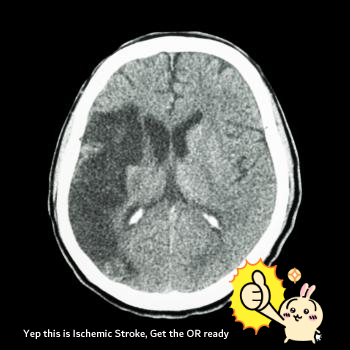

In [12]:
from google.cloud import storage
from PIL import Image
import io

# Replace with your bucket name, image file name, and project ID
bucket_name = 'instance-dog-279783831978' # e.g., 'my-image-bucket'
image_file_name = 'ct-scan-of-ischemic-stroke.jpg' # e.g., 'sunset.jpg'
project_id = '542308821679'

client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)
blob = bucket.blob(image_file_name)

try:
    # Download the image data into a BytesIO object
    image_bytes = blob.download_as_bytes()
    image_stream = io.BytesIO(image_bytes)

    # Open the image using Pillow
    img = Image.open(image_stream)

    print(f"Image '{image_file_name}' opened successfully. Format: {img.format}, Size: {img.size}")

    # Display the image
    display(img)

except Exception as e:
    print(f"Error opening image: {e}")
    print("Please ensure the bucket and image file exist, and the authenticated user has read permissions.")
